<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/html_similarities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all Libraries

In [6]:
import nltk  
import numpy as np  
from sklearn import metrics
import random  
import string
import bs4 as bs  
import urllib.request  
import re  
import heapq


# Process Raw HTML and Fit the data into a List

# The List will contain all sentences displaying on the page

In [7]:
nltk.download('punkt')

def preprocess_doc (url : str) -> list:

  raw_html = urllib.request.urlopen(url)  
  raw_html = raw_html.read()
  doc_html = bs.BeautifulSoup(raw_html, 'lxml')
  article_paragraphs = doc_html.find_all('p')

  article_text = ''
  for para in article_paragraphs:  
      article_text += para.text
  
  document = nltk.sent_tokenize(article_text)

  for i in range(len(document )):
      document [i] = document [i].lower()
      document [i] = re.sub(r'\W',' ',document [i])
      document [i] = re.sub(r'\s+',' ',document [i])

  return document


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Creates a dictionary of 200 most freequent words.

In [8]:
def find_most_freq (document: list) -> dict:
  wordfreq = {}
  for sentence in document:
      tokens = nltk.word_tokenize(sentence)
      for token in tokens:
          if token not in wordfreq.keys():
              wordfreq[token] = 1
          else:
              wordfreq[token] += 1
  most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
  return most_freq

Encodes a vector that maps the index of the most reoccuring word for each sentence. If a freequent word appears at x index, then x in the sentence vector will be marked as 1, else marked as 0.

For example, "John had some iceream for desert"

If All but the word "John" is in the 200 most freequent word dictionary.

The corresponding sentence vector is [1, 0, 0, 0, 0, 0]


In [10]:
def find_doc_cosine_sim (document : list, most_freq : dict) -> np.array:
  sentence_vectors = []
  for sentence in document:
      sentence_tokens = nltk.word_tokenize(sentence)
      sent_vec = []
      for token in most_freq:
          if token in sentence_tokens:
              sent_vec.append(1)
          else:
              sent_vec.append(0)
      sentence_vectors.append(sent_vec)
  metric = metrics.pairwise.cosine_similarity(sentence_vectors)
  return metric

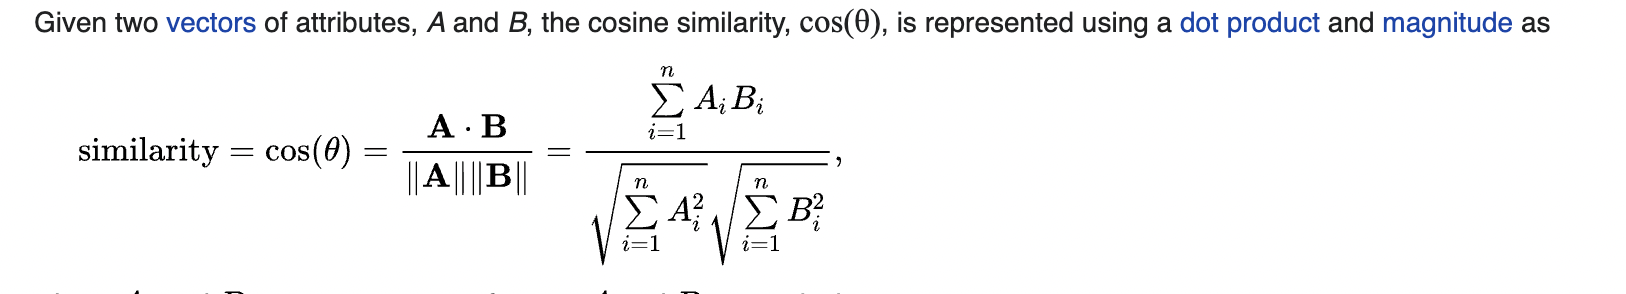

In [11]:
url = 'https://www.plymouthrock.com/claims/auto-claims'
document = preprocess_doc(url)
print(document[0])
most_freq = find_most_freq(document)
similarity_matrix = find_doc_cosine_sim(document, most_freq)
print(similarity_matrix)

 report a claim track a claim claims faqs find a repair shop personal injury protectionif you need to report a claim you may do so online or click on your state for contact information our goal is to resolve your claim in a fair and timely manner 
[[1.         0.2236068  0.30046261 0.22222222 0.        ]
 [0.2236068  1.         0.33075929 0.1490712  0.        ]
 [0.30046261 0.33075929 1.         0.18490007 0.        ]
 [0.22222222 0.1490712  0.18490007 1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


In [14]:
# Import libraries 
from urllib.request import urljoin 
from bs4 import BeautifulSoup 
import requests 
from urllib.request import urlparse 
import sys
  
  
# Set for storing urls with same domain 
links_intern = set() 
input_url = "https://www.geeksforgeeks.org"
depth = 1
  
# Set for storing urls with different domain 
links_extern = set() 
  
  
# Method for crawling a url at next level 
def level_crawler(input_url): 
    neighbours = set() 
    current_url_domain = urlparse(input_url).netloc 
  
    # Creates beautiful soup object to extract html tags
   
    beautiful_soup_object = BeautifulSoup( 
        requests.get(input_url).content, "lxml")

    # Access all anchor tags from input  
    # url page and divide them into internal 
    # and external categories 
    for anchor in beautiful_soup_object.findAll("a"): 
        href = anchor.attrs.get("href") 
        if(href != "" or href != None): 
            href = urljoin(input_url, href) 
            href_parsed = urlparse(href) 
            href = href_parsed.scheme 
            href += "://"
            href += href_parsed.netloc 
            href += href_parsed.path 
            final_parsed_href = urlparse(href) 
    
            is_valid = bool(final_parsed_href.scheme) and bool( 
                final_parsed_href.netloc) 
            if is_valid: 
                try:
                  status_code = requests.head(href).status_code
                except :
                  status_code = sys.exc_info()[0]
                if current_url_domain not in href and href not in links_extern: 
                    print("Extern - {}".format(href), " ", status_code) 
                    links_extern.add(href) 
                if current_url_domain in href and href not in links_intern: 
                    print("Intern - {}".format(href), " ", status_code) 
                    links_intern.add(href) 
                    document = preprocess_doc(href)
                    most_freq = find_most_freq(document)
                    similarity_matrix = find_doc_cosine_sim(document, most_freq)
                    similarity_matrix = np.reshape(similarity_matrix, (1, (similarity_matrix.shape[0] * similarity_matrix.shape[0] )))
                    print(similarity_matrix, '\n\n')
                    neighbours.add(href) 
    return neighbours 
  
  
if (depth == 0): 
    print("Intern - {}".format(input_url)) 
  
elif (depth == 1): 
    level_crawler(input_url) 
  
else: 
    # We have used a BFS approach 
    # considering the structure as 
    # a tree. It uses a queue based 
    # approach to traverse 
    # links upto a particular depth. 
    queue = [] 
    queue.append(input_url) 
 
  
    for j in range(depth): 
        for count in range(len(queue)): 
            url = queue.pop(0) 
            urls = level_crawler(url) 
            for i in urls: 
                queue.append(i)


Intern - https://www.geeksforgeeks.org   200
[[1.]] 


Intern - https://www.geeksforgeeks.org/   200
[[1.]] 


Intern - https://www.geeksforgeeks.org/analysis-of-algorithms-set-1-asymptotic-analysis/   200
[[1.         0.         0.51639778 ... 0.         0.25819889 1.        ]] 


Intern - https://www.geeksforgeeks.org/analysis-of-algorithms-set-2-asymptotic-analysis/   200
[[1.         0.29166667 0.29462783 ... 0.         0.23904572 1.        ]] 


Intern - https://www.geeksforgeeks.org/analysis-of-algorithms-set-3asymptotic-notations/   200
[[1.         0.31108551 0.3086067  ... 0.         0.23904572 1.        ]] 


Intern - https://www.geeksforgeeks.org/analysis-of-algorithems-little-o-and-little-omega-notations/   200
[[1.         0.18463724 0.27914526 0.27272727 0.17978663 0.17978663
  0.07106691 0.05504819 0.21110017 0.04494666 0.15569979 0.09304842
  0.15974461 0.         0.17407766 0.15386436 0.17232809 0.2177862
  0.17407766 0.18609684 0.06154575 0.15632635 0.15151515 0.08989

ValueError: ignored